In [1]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据

In [2]:
data = pd.read_csv(r'C:/Users/Administrator/Desktop/data/deep_learning/dataset/Income1.csv')

In [3]:
data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


# 画图

Text(0, 0.5, 'Income')

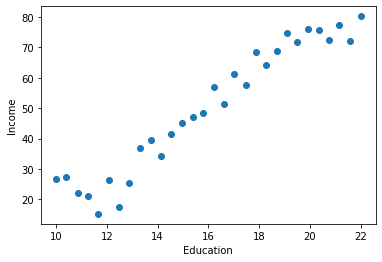

In [4]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

wx + b

# 手动实现

In [5]:
# 分解写法
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
w

tensor([-1.5564], requires_grad=True)

In [7]:
np.random.randn()

0.22582481166459206

In [8]:
w.dtype

torch.float32

In [9]:
w.data

tensor([-1.5564])

In [10]:
learning_rate = 0.001

In [29]:
X = torch.from_numpy(data.Education.values.reshape(-1, 1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1, 1)).type(torch.FloatTensor)

In [12]:
X.shape

torch.Size([30, 1])

In [13]:
w.shape

torch.Size([1])

In [14]:
for x, y in zip(X, Y):
    print(x.shape)
    print(y.shape)
    y_pred = torch.matmul(x, w) + b
    print(y_pred.shape)
    break

torch.Size([1])
torch.Size([])
torch.Size([1])


In [15]:
X.dtype

torch.float32

In [16]:
# 定义训练过程
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        # 损失函数
        loss = (y - y_pred).pow(2).sum()
        
        # pytorch对一个变量多次求导, 求导的结果会累加起来. 
        if w.grad is not None:
            # 重置w的导数
            w.grad.data.zero_()
        if b.grad is not None:
            b.grad.data.zero_()
            
        # 反向传播, 即求w,b的导数
        loss.backward()
        
        # 更新w,b
        with torch.no_grad():
            
            w.data -= w.grad.data * learning_rate
            b.data -= b.grad.data * learning_rate

In [17]:
w

tensor([5.1266], requires_grad=True)

In [18]:
b

tensor([-32.6954], requires_grad=True)

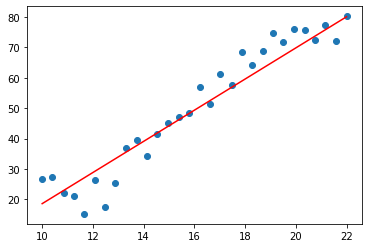

In [19]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), (torch.matmul(X, w) + b).data.numpy(), c='r')

# pytorch实现线性回归--封装写法

In [20]:
from torch import nn

In [21]:
# 和tensorflow中的Dense一个意思
# wx + b
model = nn.Linear(1, 1)

In [22]:
model

Linear(in_features=1, out_features=1, bias=True)

In [23]:
# 定义损失函数
loss_fn = nn.MSELoss()

In [24]:
# 即W
model.parameters()

<generator object Module.parameters at 0x0000024DC88D96D0>

In [25]:
# 定义优化器
# 优化器的第一个参数必须是要更新的模型中的参数
opt = torch.optim.SGD(model.parameters(), lr=0.001)

In [30]:
# 训练
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y, y_pred)
        # 梯度清零操作
        opt.zero_grad()
        loss.backward()
        # 更新操作
        opt.step()

In [31]:
# w
model.weight

Parameter containing:
tensor([[5.1309]], requires_grad=True)

In [32]:
# b
model.bias

Parameter containing:
tensor([-32.7909], requires_grad=True)